# Model
in this file we will build a model can predict the traffic congestion caused by projects. We will use data for traffic volume and new projects NYC from 2012 to 2019.  



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import timeseries_dataset_from_array


**Upload Data**

In [ ]:
traffic = pd.read_csv('/content/drive/MyDrive/October 4/4oct_final_data_before_encodeing.csv')
traffic

,Datetime,Avg_Vol_Geo,Boro,street,holidays,Floor,Area (sq ft),Type_of_Project,project_active
0,2012-01-01,41.246324,Bronx,RIVER AVENUE,False,0,0,No_Project,False
1,2012-01-01,39.777778,Bronx,GERARD AVENUE,False,0,0,No_Project,False
2,2012-01-01,95.380769,Bronx,EAST 138 STREET,False,0,0,No_Project,False
3,2012-01-01,51.384030,Bronx,EAST 144 STREET,False,0,0,No_Project,False
4,2012-01-01,127.368421,Bronx,EAST 149 STREET,False,0,0,No_Project,False
...,...,...,...,...,...,...,...,...,...
30618,2019-12-01,18.015504,Staten Island,FRONT STREET,False,0,0,No_Project,False
30619,2019-12-01,50.969072,Staten Island,CANAL STREET,False,0,0,No_Project,False
30620,2019-12-01,28.273902,Staten Island,MURRAY HULBERT AVENUE,False,0,0,No_Project,False
30621,2019-12-01,29.984496,Staten Island,FRONT STREET,False,0,0,No_Project,False


In [ ]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30623 entries, 0 to 30622
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Datetime         30623 non-null  object 
 1   Avg_Vol_Geo      30623 non-null  float64
 2   Boro             30623 non-null  object 
 3   street           30623 non-null  object 
 4   holidays         30623 non-null  bool   
 5   Floor            30623 non-null  int64  
 6   Area (sq ft)     30623 non-null  int64  
 7   Type_of_Project  30623 non-null  object 
 8   project_active   30623 non-null  bool   
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 1.7+ MB


In [ ]:
traffic['Datetime'] = pd.to_datetime(traffic['Datetime'])
traffic = traffic.set_index('Datetime')
traffic = traffic.sort_index()

# Encoding

we encode each non-numrical column depend on the value of each column.
- Label Encoder -> for `street` because this column contain over 600 unique value.
- One Hot Encoding -> for `Type_of_Project` and `Boro` they are a categorical data.

In [ ]:
label_encoder = LabelEncoder()
traffic['street'] = label_encoder.fit_transform(traffic['street'])

In [ ]:
traffic = pd.get_dummies(traffic, columns=['Type_of_Project', 'Boro'])

In [ ]:
traffic.head()

,Avg_Vol_Geo,street,holidays,Floor,Area (sq ft),project_active,Type_of_Project_Commercial Development,Type_of_Project_Cultural,Type_of_Project_Educational,Type_of_Project_Elevated Public Park,...,Type_of_Project_Outdoor Observation Deck,Type_of_Project_Park,Type_of_Project_Residential,Type_of_Project_Train Station / Transit Hub,Type_of_Project_Transportation,Boro_Bronx,Boro_Brooklyn,Boro_Manhattan,Boro_Queens,Boro_Staten Island
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01,41.246324,2790,False,0,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2012-01-01,21.768407,152,False,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2012-01-01,65.111842,2409,False,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2012-01-01,65.111842,2407,False,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2012-01-01,66.202929,2807,False,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


look if there are any outliers, to select the correct scaler. for example MinMaxScaler Affected by outliers values.


Number of outliers in Avg_Vol_Geo: 2343


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


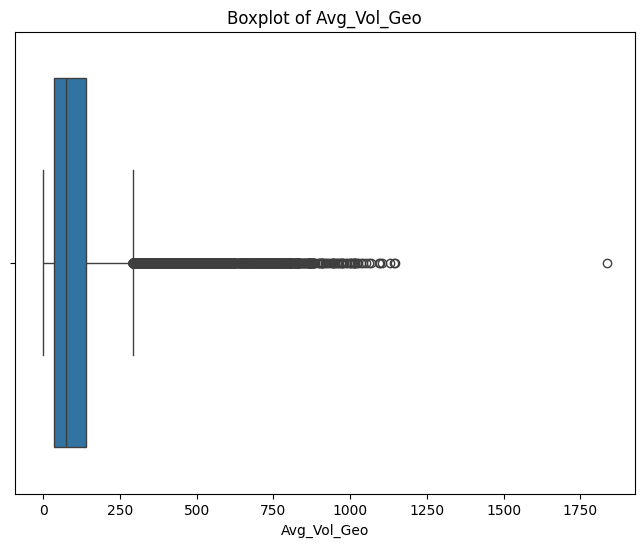

In [ ]:
# prompt: is Avg_Vol_Geo outliers then visualize using boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR (Interquartile Range)
Q1 = traffic['Avg_Vol_Geo'].quantile(0.25)
Q3 = traffic['Avg_Vol_Geo'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = traffic[(traffic['Avg_Vol_Geo'] < lower_bound) | (traffic['Avg_Vol_Geo'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers in Avg_Vol_Geo: {len(outliers)}")

# Visualize using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=traffic['Avg_Vol_Geo'])
plt.title('Boxplot of Avg_Vol_Geo')
plt.show()


In [ ]:
traffic[traffic['Avg_Vol_Geo'] > 1500]

,Avg_Vol_Geo,street,holidays,Floor,Area (sq ft),project_active,Type_of_Project_Commercial Development,Type_of_Project_Cultural,Type_of_Project_Educational,Type_of_Project_Elevated Public Park,...,Type_of_Project_Outdoor Observation Deck,Type_of_Project_Park,Type_of_Project_Residential,Type_of_Project_Train Station / Transit Hub,Type_of_Project_Transportation,Boro_Bronx,Boro_Brooklyn,Boro_Manhattan,Boro_Queens,Boro_Staten Island
Datetime,,,,,,,,,,,,,,,,,,,,,
2014-07-01,1835.611111,2326,True,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
traffic = traffic.drop(traffic[traffic['Avg_Vol_Geo'] > 1500].index) #we drop it becaause there are not spical event or any thing on this day. Moreover it is only one value from 30k.

In [ ]:
traffic.info() #data after encoding

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30326 entries, 2012-01-01 to 2019-12-01
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Avg_Vol_Geo                                   30326 non-null  float64
 1   street                                        30326 non-null  int64  
 2   holidays                                      30326 non-null  bool   
 3   Floor                                         30326 non-null  int64  
 4   Area (sq ft)                                  30326 non-null  int64  
 5   project_active                                30326 non-null  bool   
 6   Type_of_Project_Commercial Development        30326 non-null  bool   
 7   Type_of_Project_Cultural                      30326 non-null  bool   
 8   Type_of_Project_Educational                   30326 non-null  bool   
 9   Type_of_Project_Elevated Public Park        

# Split the data

we divide our data in to train, validation, and test. It is a time series data So, we should not shuffling the data.

In [ ]:
train_val, test = train_test_split(traffic, test_size=0.15, shuffle=False)
train, val = train_test_split(train_val, test_size=0.2, shuffle=False)

In [ ]:
train.shape, val.shape, test.shape

((20621, 29), (5156, 29), (4549, 29))

# Normalizing

In [ ]:

scaler = MinMaxScaler()
numerical_cols = ['Avg_Vol_Geo', 'Area (sq ft)']

train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
val[numerical_cols] = scaler.transform(val[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

In [ ]:
window_size = 36
time_steps = 12

def create_timeseries_dataset(df, window_size, batch_size=1024):
    # Handle missing values
    df = df.fillna(0)
    df = df.replace([np.inf, -np.inf], 0)

    # Convert to float32 NumPy array
    array = df.values.astype(np.float32)

    # Optionally, verify the array
    print(f"Array shape: {array.shape}, dtype: {array.dtype}")
    print("First 5 rows of the array:")
    print(array[:5])

    dataset = timeseries_dataset_from_array(
        data=array[:-window_size],
        targets=array[window_size:, 0],
        sequence_length=window_size,
        batch_size=batch_size
    )

    return dataset

#Assuming 'train', 'val', 'test' are your DataFrames
train_Xy = create_timeseries_dataset(train, window_size)
val_Xy = create_timeseries_dataset(val, window_size)
test_Xy = create_timeseries_dataset(test, window_size)


Array shape: (20621, 29), dtype: float32
First 5 rows of the array:
[[3.5999760e-02 2.7900000e+03 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.8999448e-02 1.5200000e+02 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [5.6829564e-02 2.4090000e+03 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000

# Model

In [ ]:
num_features = train.shape[1]  # Number of columns/features in the training data
print(f"Number of features: {num_features}")

Number of features: 29


**Build and train the model**

In [ ]:
model = Sequential([
    LSTM(units=64, activation='tanh', return_sequences=False,
              input_shape=(window_size, num_features), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(units=32, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='relu')
])

optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(train_Xy, validation_data=(val_Xy), epochs=30, batch_size=128,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/30
21/21 [==============================] - 5s 158ms/step - loss: 0.0689 - mae: 0.0987 - val_loss: 0.0605 - val_mae: 0.0957 - lr: 5.0000e-04
Epoch 2/30
21/21 [==============================] - 3s 127ms/step - loss: 0.0590 - mae: 0.0973 - val_loss: 0.0520 - val_mae: 0.0957 - lr: 5.0000e-04
Epoch 3/30
21/21 [==============================] - 3s 128ms/step - loss: 0.0510 - mae: 0.0967 - val_loss: 0.0451 - val_mae: 0.0957 - lr: 5.0000e-04
Epoch 4/30
21/21 [==============================] - 3s 123ms/step - loss: 0.0440 - mae: 0.0956 - val_loss: 0.0373 - val_mae: 0.0881 - lr: 5.0000e-04
Epoch 5/30
21/21 [==============================] - 3s 122ms/step - loss: 0.0374 - mae: 0.0911 - val_loss: 0.0266 - val_mae: 0.0633 - lr: 5.0000e-04
Epoch 6/30
21/21 [==============================] - 3s 121ms/step - loss: 0.0311 - mae: 0.0863 - val_loss: 0.0228 - val_mae: 0.0624 - lr: 5.0000e-04
Epoch 7/30
21/21 [==============================] - 3s 122ms/step - loss: 0.0262 - mae: 0.0801 - val_loss:

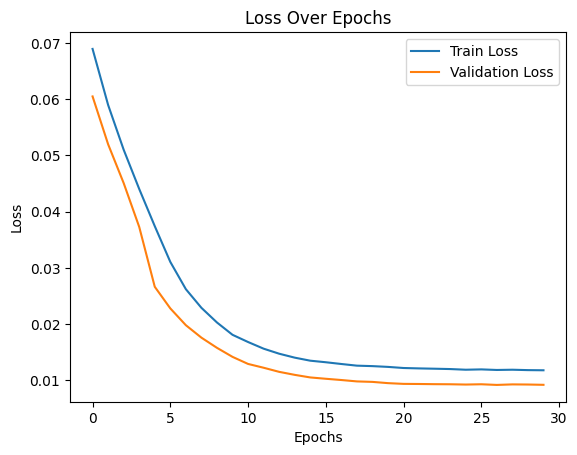

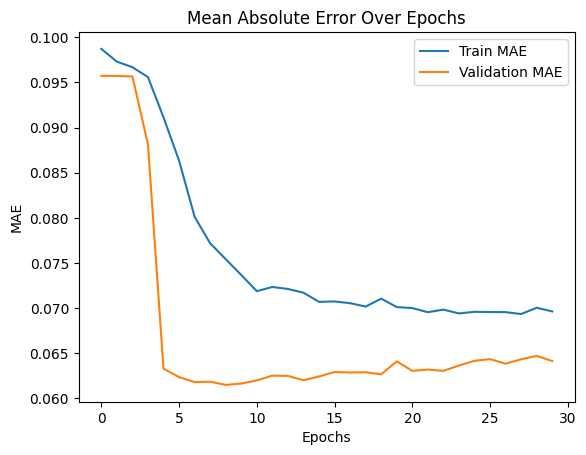

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.legend()
plt.show()

<Axes: >

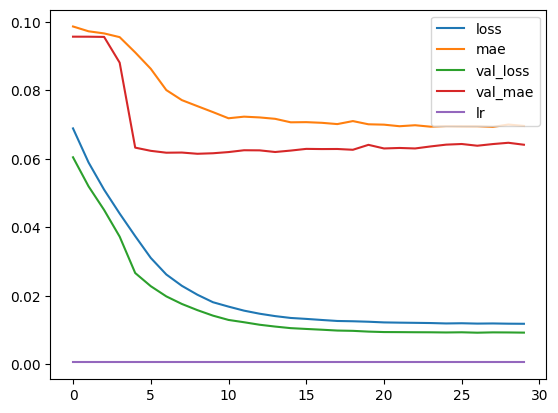

In [ ]:
pd.DataFrame(history.history).plot()

**Evaluate the model**

In [ ]:
# Optionally, calculate metrics like RMSE or MAE to quantify the prediction accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(actual_values, predictions))
mae = mean_absolute_error(actual_values, predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 0.10985573381185532
MAE: 0.0678316205739975


**Save the model**, encoding, and normalizing to use it in deployment

In [ ]:
model.save('LSTM_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
